In [347]:
import importlib
import experiment
importlib.reload(experiment)
import models
importlib.reload(models)

from experiment import *

In [348]:
exp_name = "GST-D1-HLM"

from pathlib import Path
path = Path("./data/GST-DCP1-HLM+E3-LSM-221219/gst-D1-HLM_VS_E3-LSM")
fs = sorted(list(path.glob("*.csv")))

controls_path = Path("./data/GST-DCP1-HLM+E3-LSM-221219/controls")
controls_fs = sorted(list(controls_path.glob("*.csv")))
print(len(fs))
print(len(controls_fs))

17
5


Exp.params is None. Fit and offset plots are not available


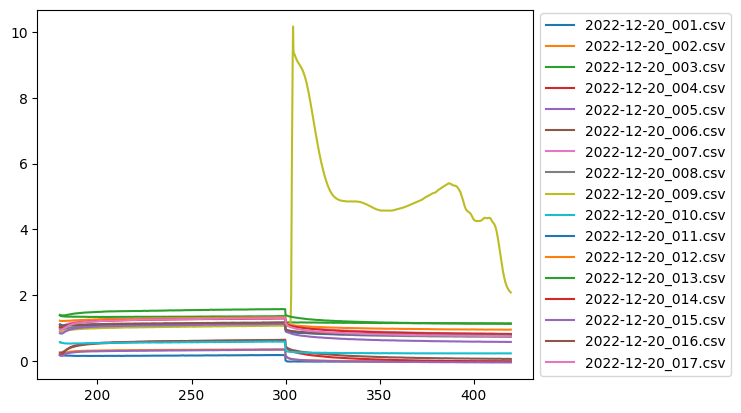

In [349]:
exp = Exp()
exp.load_bli_data(fs)
exp.plot()

#remove loading and baselines
for ds in exp:
    s = ds.steps[0].start
    mask = ds.t >= s
    ds.response = ds.response[mask]
    ds.t = ds.t[mask]

Exp.params is None. Fit and offset plots are not available


(<Figure size 640x480 with 1 Axes>, <Axes: >)

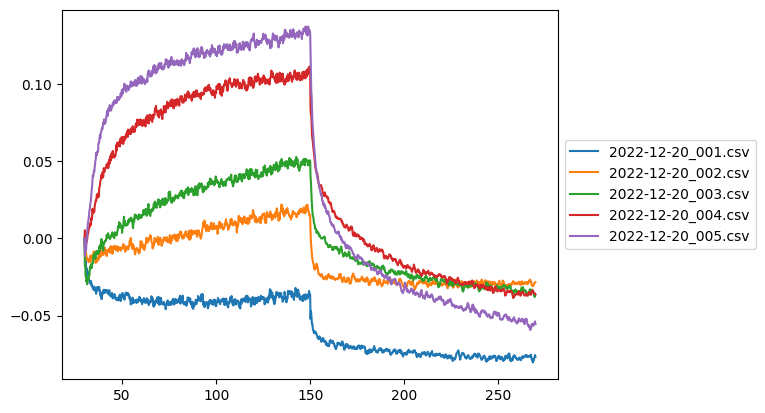

In [350]:
controls = Exp()
controls.load_bli_data(controls_fs)
controls.interstep_correction()
controls.plot()


In [351]:
#load descriptions, need to copy from blitz
desc = Path("./data/GST-DCP1-HLM+E3-LSM-221219/dataset_description.txt")
df = pd.read_csv(desc, sep='\t', index_col=0)
df

,Show,Analyze,Ref.,Sample ID,Conc. (uM),Run time (s),Shaker speed (rpm),Integration (ms),Biosensor Type,Information,Status
Index,,,,,,,,,,,
1,1,0,0,blank,0.0,420,1000,2.3,Anti-GST,calkiem pusty sensor,NaN
2,1,0,0,blank2,NaN,420,1000,2.3,Anti-GST,"no bait, 24uM LSM",NaN
3,1,0,0,blank3,NaN,420,1000,2.3,Anti-GST,bait + blank analyte,NaN
4,1,0,0,NaN,24.0,420,1000,2.3,Anti-GST,sensor ten co poprzednio,NaN
5,1,0,0,blank4,NaN,420,1000,2.2,Anti-GST,"no bait, 24uM LSM, czysty sensor",NaN
6,1,1,0,NaN,16.0,420,1000,2.2,Anti-GST,NaN,NaN
7,1,1,0,NaN,8.0,420,1000,2.2,Anti-GST,NaN,NaN
8,1,1,0,NaN,4.0,420,1000,2.2,Anti-GST,NaN,NaN
9,1,0,0,NaN,2.0,420,1000,2.3,Anti-GST,dysocjacja poszla w pustej tubce,Saturated response


In [352]:
#assign concentrations from desc to each dataset
concs = df['Conc. (uM)'].to_dict()
analyze = df['Analyze'].to_dict()

for ds in exp.datasets:
    idx = ds.name[:-4].split('_')[-1]
    idx=int(idx)
    c = concs[idx]
    if np.isnan(c): c=0
    ds.steps[0].concentration = c*1e-6
    ds.use_for_fit = analyze[idx]



In [353]:
#assign conentrations to controls
controls_c = [1,2,4,8,16]
controls_c = [c*1e-6 for c in controls_c]

for ds, c in zip(controls, controls_c):
    ds.steps[0].concentration = c

1.6e-05
correcting c= 1.6e-05
8e-06
correcting c= 8e-06
4e-06
correcting c= 4e-06
1e-06
correcting c= 1e-06
1e-06
correcting c= 1e-06
2e-06
correcting c= 2e-06
4e-06
correcting c= 4e-06
8e-06
correcting c= 8e-06
2e-06
correcting c= 2e-06
1.6e-05
correcting c= 1.6e-05
Exp.params is None. Fit and offset plots are not available


(<Figure size 640x480 with 1 Axes>, <Axes: >)

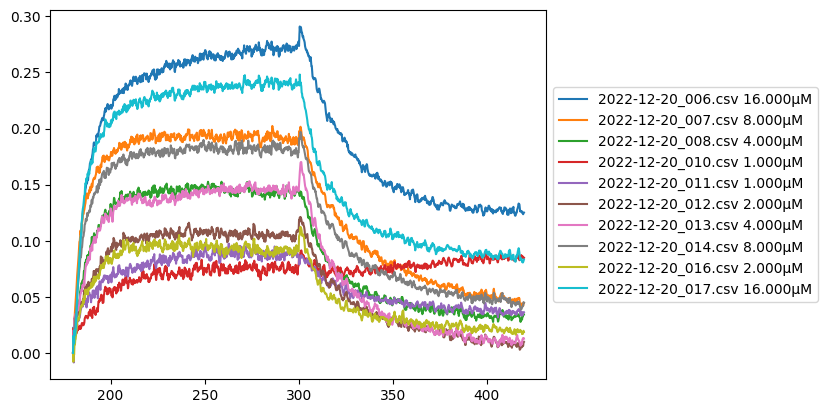

In [354]:
controls_dict = {}
for ds in controls:
    control_mask = ds.t>=ds.steps[0].start
    c = ds.steps[0].concentration
    controls_dict[c] = ds.response[control_mask]


#subtract controls from ds
for ds in exp:
    if not ds.use_for_fit: continue
    print(ds.steps[0].concentration)
    start = ds.steps[0].start
    mask = ds.t>=start
    r = ds.response[mask]
    c = ds.steps[0].concentration
    if c in controls_dict:
        print('correcting c=',c)
        #analyte ref
        ds.response[mask] = np.subtract(r, controls_dict[c])
        #lig ref
        ds.response[mask] = np.subtract(ds.response[mask], exp.datasets[2].response[mask])
    
        
exp.interstep_correction()
exp.plot()

In [355]:
# exp.crop(5)

In [356]:
for ds in exp:
    print(ds.index, ds.name)

0 2022-12-20_001.csv
1 2022-12-20_002.csv
2 2022-12-20_003.csv
3 2022-12-20_004.csv
4 2022-12-20_005.csv
5 2022-12-20_006.csv
6 2022-12-20_007.csv
7 2022-12-20_008.csv
8 2022-12-20_009.csv
9 2022-12-20_010.csv
10 2022-12-20_011.csv
11 2022-12-20_012.csv
12 2022-12-20_013.csv
13 2022-12-20_014.csv
14 2022-12-20_015.csv
15 2022-12-20_016.csv
16 2022-12-20_017.csv


In [357]:
#remove some datasets
ds_to_remove = []
for ds in exp:
    if ds.use_for_fit == False:
        ds_to_remove.append(ds)
    if ds.index in []:
        ds_to_remove.append(ds)
for ds in ds_to_remove:
    exp.datasets.remove(ds)

In [358]:
exp.model = models.One_to_one()
exp.model.params_definitions

{'ka': <Parameter 'ka', value=10000.0, bounds=[10.0:10000000.0]>,
 'kd': <Parameter 'kd', value=0.01, bounds=[1e-06:0.1]>,
 'kt': <Parameter 'kt', value=10000000.0, bounds=[10.0:1000000000000.0]>,
 'ymax': <Parameter 'ymax', value=1, bounds=[1e-12:1000]>,
 'offset': <Parameter 'offset', value=0, bounds=[-1000:1000]>}

In [359]:
# exp.model.params_definitions['ymax'].user_data['type']='global'

exp.model.params_definitions['offset'].min= -0.1
exp.model.params_definitions['offset'].max= 0.1
exp.model.params_definitions['ymax'].max= 1
exp.model.params_definitions['ymax'].value= 0.25
exp.model.params_definitions['ka'].max= 1e5
exp.model.params_definitions['ka'].min= 100
exp.model.params_definitions['ka'].value = 5000

# exp.model.params_definitions['offset'].min= -0.1
# exp.model.params_definitions['offset'].max= 0.1
# exp.model.params_definitions['ymax1'].max= 1
# exp.model.params_definitions['ymax2'].max= 1

exp.create_params(offsets=True, mtl = False)





In [360]:
exp.fit_params()

fitting using: least_squares


'`ftol` termination condition is satisfied.'

(<Figure size 640x480 with 1 Axes>, <Axes: >)

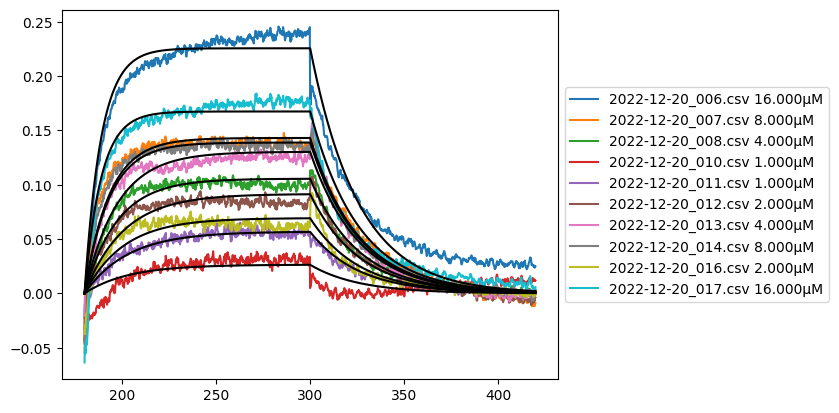

In [361]:
exp.plot(fit=True, correct_offsets=True)

In [362]:
from uncertainties import ufloat
ka = exp.result.params['ka'].value
ka_err = exp.result.params['ka'].stderr
kaa = ufloat(ka, ka_err)

kd = exp.result.params['kd'].value
kd_err = exp.result.params['kd'].stderr
kdd = ufloat(kd, kd_err)

Kd = kdd/kaa
Kd

8.278470816948663e-06+/-1.439056538205451e-07

In [364]:
exp.summary()

'ka: 4.6786E+03\nkd: 3.8732E-02\nKD:8.2785E-06\nR²: 0.9834\nchi²: 0.8767090640901545\nreduced chi²: 7.325443383106237e-05\n'

In [277]:
import plotly.graph_objects as go

fig = go.Figure()

for ds in exp.datasets:
    if ds.use_for_fit == False: continue
    x = np.array([])
    y = np.array([])
    y_fit = np.array([])
    
    for step in ds.steps:
        # if step.concentration>0: color = 'orangered'
        # elif step.concentration==0: color = 'cornflowerBlue'
        # else: color = 'lightgrey'
        mask = (ds.t>=step.start) & (ds.t<step.stop)

        if f"offset_ds{ds.index}_step{step.index}" in exp.params:
                offset = exp.params[f'offset_ds{ds.index}_step{step.index}'].value
        else: 
            offset = 0
        
        x_step = ds.t[mask]
        y_step = ds.response[mask] - offset
        y_fit_step = ds.fit_response[mask] - offset

        x = np.concatenate([x, x_step])
        y = np.concatenate([y, y_step])
        y_fit = np.concatenate([y_fit, y_fit_step])

    
    x = x - x[0]
    fig.add_scatter(x = x, 
                    y = y_fit,
                    marker=dict(size=0, 
                            color='black',
                            line=dict(width=1, color='black')),
                    line=dict(
                         width=2, 
                         color='black'
                         ),
                    name=ds.steps[0].concentration,)

        

    fig.add_scatter(x = x,
                    y = y,
                    marker=dict(
                            size=0, 
                            #color=color, 
                            line=dict(
                                    width=0.1, 
                                    #color=color
                                    )),
                    line=dict(
                            width=1, 
                            #color=color
                            ),
                    name=f"{ds.index}_{ds.steps[0].concentration}",
                    )



fig.update_layout(
            height=600,
            width = 800,
            font_family="Arial",
            font_size = 24,
            showlegend=False,
            margin=dict(l=0,r=0,b=0,t=0,pad=0), 
            template='plotly_white',
            paper_bgcolor="rgb(255, 255, 255)",  
            plot_bgcolor="rgb(255, 255, 255)") 

fig.update_xaxes(
    ticklabelposition="inside top", 
    title='time [s]',
    showline=True, 
    linewidth=1, 
    linecolor='black', 
    showgrid=False,
    mirror=True)

fig.update_yaxes(
    ticklabelposition="outside top", 
    title='Response [nm]',
    showline=True, 
    linewidth=1, 
    linecolor='black', 
    showgrid=False,
    mirror=True)



fig.show()

In [272]:
for ds in exp:
    if ds.index in [9, 15,  6, 12, 5]:#, 15, 6, 7, 16, 5]:
        ds.use_for_fit = False
    if ds.index in []:
        ds.use_for_fit = True
    # if ds.steps[0].concentration==16e-6:
    #     ds.use_for_fit = True



In [268]:
for ds in exp:
    ds.use_for_fit = True

In [269]:
exp.crop(3)

In [270]:
# exp.result

In [283]:
r = exp.result
r.residual.shape
1 - r.residual.var() / np.var(y)


nan

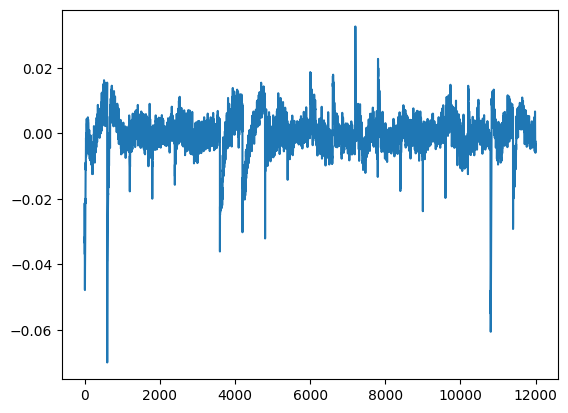

In [64]:
plt.plot(exp.result.residual)

In [281]:
import kaleido
exp_name = "GST-D1_E3-HLM"
fig.write_image(f'{exp_name}-{exp.model.name}.png')

In [282]:
report_filename = 'gst-d1-hlm_e3-lsm'

from lmfit.printfuncs import fitreport_html_table
s = fitreport_html_table(exp.result, show_correl=True,  min_correl=0.1)

with open(f"{exp_name}.htm", 'w') as f:
    f.write(s)


In [280]:
from uncertainties import ufloat
def get_html_report(show_correl=True):
    result = exp.result
    tables = result._repr_html_(show_correl=show_correl)
    
    if ('ka' in result.params) and ('kd' in result.params):
        t = []
        cell = lambda x, tag: f'<{tag}> {x} </{tag}>'
        
        has_er = hasattr(result.params['ka'], 'stderr') and (result.params['ka'].stderr is not None)

        if has_er:
            ka = ufloat(float(result.params['ka'].value), float(result.params['ka'].stderr))
            kd = ufloat(float(result.params['kd'].value), float(result.params['kd'].stderr))
            Kd = kd/ka
        else:
            Kd = result.params['kd'].value/result.params['ka'].value

        t.append('<h2>Dissociation constant</h2>')
        t.append('<table><tr>')
        t.append(cell(f"<b>Name</b>", 'td'))
        t.append(cell(f"<b>value</b>", 'td'))
        t.append(cell(f"<b>standard error</b>", 'td'))
        t.append(cell(f"<b>relative error</b>", 'td'))  
        t.append('</tr><tr>')
        t.append(cell(f"<b>Kd</b>", 'td'))
        if has_er:
            t.append(cell(f"{Kd.n:.5e}", 'td'))
            t.append(cell(f"{Kd.std_dev:.5e}", 'td'))
            t.append(cell(f"{Kd.std_dev/Kd.n:.2%}", 'td'))
        else:
            t.append(cell(f"{Kd:.5e}", 'td'))
            t.append(cell("NA", 'td'))
            t.append(cell("NA", 'td'))
        t.append('</table></tr></table>')

        return tables + ''.join(t)
    
    else: 
        return tables

report = get_html_report(show_correl=False)
with open(f'{exp_name}extended_report.htm','w') as f:
    f.write(report)

In [66]:
params = exp.result.params
y0=None
resids = []
y_data = []

for dataset in exp:
    if dataset.use_for_fit == False: 
        continue
    dataset_resids = dataset.response - exp.calc_dataset_response_from_params(dataset, params, y0)
    resids.append(dataset_resids)
    y_data.append(dataset.response)

residuals = np.concatenate(resids)
y_data = np.concatenate(y_data)
residuals.shape
y_data.shape

(6000,)

In [67]:
residuals = exp.result.residual
mask = ~np.isnan(y_data)
y_data = y_data[mask]

ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)

In [68]:
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.982435853992191

In [69]:
1 - exp.result.residual.var() / np.var(y_data)

0.9912179269960956

In [70]:
params = exp.result.params
y0=None
resids = []
y_data = []

for dataset in exp:
    if dataset.use_for_fit == False: 
        continue
    dataset_resids = dataset.response - exp.calc_dataset_response_from_params(dataset, params, y0)
    resids.append(dataset_resids)
    y_data.append(dataset.response)

residuals = np.concatenate(resids)
y_data = np.concatenate(y_data)
residuals.shape
y_data.shape

(6000,)

In [72]:
1 - exp.result.redchi / np.var(y, ddof=2)

0.9946477223963922

In [654]:
resi = exp.result.residual
exp.result.residual.var()

0.3903185760434541

In [658]:
1 - (exp.result.residual.var() / np.var(y))

-0.04384678738694392

In [655]:
rss = (resi**2).sum()
rss

11508.154249688201

In [656]:
tss = sum(np.power(resi - np.mean(resi), 2)) 
print(f"TSS = {tss:.1f}")

print(f"R² = {1 - rss/tss:.3f}")

TSS = 8001.5
R² = -0.438


In [528]:
y2.shape

(20500,)

In [73]:
exp.result.residual.shape

(12000,)

In [78]:
0.07461523/248.991774

0.00029966945815647713

In [76]:
0.01498096/37982.4598

3.944178465239895e-07

In [79]:
exp.result